### Python for Data Science III
### Edgar Acuna
### IV. Computing statistical measures of centrality and  dispersion-Boxplot

In [35]:
import pandas as pd
import numpy as np
from scipy import stats 

In [36]:
#este cojunto de datos esta disponible en kaggle.com
df=pd.read_csv("c://PW-PR/student-por.csv",sep=",")

In [37]:
df.head()

school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other ...   
3     GP   F   15       U     GT3       T     4     2   health  services ...   
4     GP   F   16       U     GT3       T     3     3    other     other ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        4   0  11  11  
1      5        3      3     1     1      3        2   9  11  11  
2      4        3      2     2     3      3        6  12  13  12  
3      3        2      2     1     1      5        0  14  14  14  
4      4        3      2     1     2      5        0  11  13  13  

[5 rows x 33 columns]

In [38]:
#Dimension de la base de datos
print(df.shape)

(649, 33)


In [39]:
#Average of variable age using pandas
df['age'].mean()

16.7442218798151

In [40]:
#Average of variable age using numpy
np.mean(df['age'])

16.7442218798151

In [41]:
#Average of variables: age and absences
np.mean(df[['age','absences']])

age         16.744222
absences     3.659476
dtype: float64

In [42]:
#Median variable age
np.median(df['age'])

17.0

In [43]:
#Average of variable age using  module stats
stats.describe(df['age'])

DescribeResult(nobs=649L, minmax=(15, 22), mean=16.7442218798151, variance=1.483859308718066, skewness=0.41583144316169546, kurtosis=0.06172808922743078)

In [44]:
mean=stats.describe(df['age'])[2]
print "The mean is:", mean

The mean is: 16.7442218798


In [45]:
#computing the mode using pandas
df['age'].mode()

0    17
dtype: int64

In [46]:
#calculando la moda de la variable age using stats
stats.mode(df['age'])[0][0]

17

In [47]:
#computing the mode of varible school using pandas
df['school'].mode()

0    GP
dtype: object

In [48]:
#Calculando la moda de la variable school
stats.mode(df['school'])[0][0]

'GP'

In [49]:
#calculando la media podada del 10% de la variable age
stats.trim_mean(df['age'],.1)

16.700575815738965

In [50]:
#Calulando la varianza de la variable age usando numpy
np.var(df['age'])

1.4815729307385312

In [51]:
#Calculando la varianza de la variable age usando stats
var=stats.describe(df['age'])[3]
print "The variance is:", var

The variance is: 1.48385930872


### Variance by default in Numpy: $$\sigma^2=\frac{\sum_{i=1}^n(x_i-\bar{x})^2}{n}$$
### Variance by default in Pandas, stats:  $$\sigma^2=\frac{\sum_{i=1}^n(x_i-\bar{x})^2}{n-1}$$

In [52]:
#Calculando la varianza de la variable age usando numpy pero dividienedo entre n-1
np.var(df['age'],ddof=1)

1.483859308718066

In [53]:
#Calculando la desviacion estandar de la variable age. El modulo stats no calcula la desviaicon estandar
np.std(df['age'],ddof=1)

1.2181376394800656

In [54]:
#Computing the Coefficient of Variation
stats.variation(df['age'])*100

7.2693661949360919

#### The CV is only 7.26% therefore the variable age does not show much variability 

In [55]:
#First criterion to detect outliers
lower=np.mean(df['age'])-3*np.std(df['age'],ddof=1)
upper=np.mean(df['age'])+3*np.std(df['age'],ddof=1) 
print "El intervalo donde caen los datos que NO son outliers es:", "\n",lower,"-",upper

El intervalo donde caen los datos que NO son outliers es: 
13.0898089614 - 20.3986347983


In [56]:
#Identificando outliers
for a in df['age']:
    if (a<lower or a>upper):
        print "outlier",a        

outlier 22
outlier 21
outlier 21


{'boxes': [<matplotlib.lines.Line2D at 0xbb3c7f0>],
 'caps': [<matplotlib.lines.Line2D at 0xbb554e0>,
 'fliers': [<matplotlib.lines.Line2D at 0xbb63588>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0xbb55fd0>],
 'whiskers': [<matplotlib.lines.Line2D at 0xbb3c908>,
  <matplotlib.lines.Line2D at 0xbb3cf28>]}

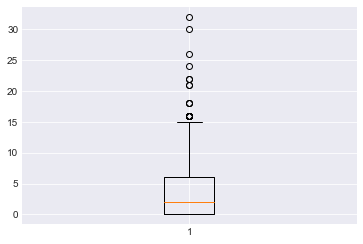

In [57]:
#Trazando el boxplot con matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
plt.boxplot(df["absences"])

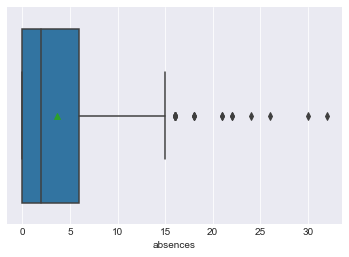

In [58]:
#Trazando el Boxplot con seaborn
import seaborn as sns
sns.set_style("darkgrid")
ax=sns.boxplot(x=df["absences"],showmeans=True)